# Sınıflandırma Problemleri 

In [4]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

## Lojistik Regrasyon Model

In [6]:
diabetes = pd.read_csv("diabetes.csv")
df= diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

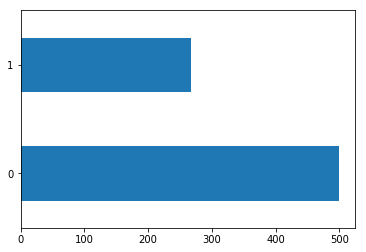

In [10]:
df["Outcome"].value_counts().plot.barh();

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
y=df["Outcome"]   # y= Outcome değişkeni 
X=df.drop(["Outcome"], axis=1)   # X= Outcome dışındaki değişkenler.

In [ ]:
#Statsmodels

In [16]:
loj= sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                 0.05922
Time:                        13:52:07   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [ ]:
#Scikit-learn 

In [18]:
from sklearn.linear_model import LogisticRegression
loj= LogisticRegression(solver="liblinear")
loj_model= loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [19]:
loj_model.intercept_

array([-5.86287347])

In [20]:
loj_model.coef_

array([[ 1.16994001e-01,  2.83105146e-02, -1.69330434e-02,
         7.60583358e-04, -6.35908885e-04,  5.94454510e-02,
         6.72330649e-01,  7.15329890e-03]])

# Lojistik Reg Tahmin Model Tunning 

In [21]:
y_pred = loj_model.predict(X)

In [22]:
confusion_matrix(y,y_pred) # karmaşıklık matrisi 

array([[448,  52],
       [121, 147]])

In [23]:
accuracy_score(y,y_pred) ## Doğru sınıflandırma oranı 

0.7747395833333334

In [25]:
print(classification_report(y,y_pred)) #sınıflandırma alg sonuçlarını en detaylı görebileceğimiz 
#methodlardan birisi

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [27]:
loj_model.predict(X)[0:10] #tahmin edilen ilk 10 değer 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [30]:
y[0:10]  #gerçek ilk 10 değer

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [29]:
loj_model.predict_proba(X)[0:10][:,0:2] #0. indexte 0 olma olasılığı, 1. indexte 1 olma olasılığı 

array([[0.35135889, 0.64864111],
       [0.91652333, 0.08347667],
       [0.22513673, 0.77486327],
       [0.92079448, 0.07920552],
       [0.16874003, 0.83125997],
       [0.79824927, 0.20175073],
       [0.87936303, 0.12063697],
       [0.27713092, 0.72286908],
       [0.32074724, 0.67925276],
       [0.92211384, 0.07788616]])

In [31]:
y_probs = loj_model.predict_proba(X)[:,1]

In [32]:
y_pred= [1 if i>0.5 else 0 for i in y_probs]

In [35]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [ ]:
#Yine aynı değerler gelir 

In [36]:
confusion_matrix(y,y_pred) # karmaşıklık matrisi 

array([[448,  52],
       [121, 147]])

In [37]:
accuracy_score(y,y_pred) ## Doğru sınıflandırma oranı 

0.7747395833333334

In [38]:
print(classification_report(y,y_pred)) #sınıflandırma alg sonuçlarını en detaylı görebileceğimiz 
#methodlardan birisi

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



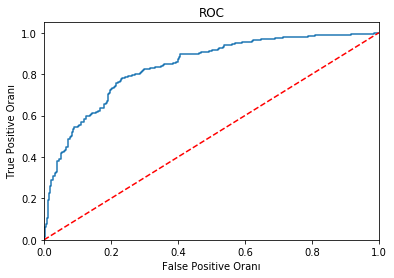

In [39]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [40]:
#Doğrulama yöntemi için test train ayrımı yapılır
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [41]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [42]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7575757575757576

In [43]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

# Naive Bayes - Model & Tahmin

In [4]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [5]:
from sklearn.naive_bayes import GaussianNB

In [6]:
nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [8]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [9]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [10]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7445887445887446

In [11]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN Model Tahmin 

In [12]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [14]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# KNN Model Tunning 

In [21]:
knn_params={"n_neighbors": np.arange(1,50)}

In [22]:
knn= KNeighborsClassifier()

In [24]:
knn_cv = GridSearchCV(knn,knn_params, cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [28]:
print("En iyi parametre değeri : ",knn_cv.best_params_)
print("En iyi parametre değeri : ",knn_cv.best_score_)

En iyi parametre değeri :  {'n_neighbors': 11}
En iyi parametre değeri :  0.748637316561845


In [29]:
knn= KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train,y_train)

In [30]:
#Sadece bu işlem ile yaparsak y_pred değeri arka planda oluşturulur ve görüldüğü gibi aynı çıktıyı verir. 
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [32]:
y_pred= knn_tuned.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7316017316017316

# SVC Model Tahmin 

In [34]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [35]:
# fit etme ve nesne oluşturma işlemini beraber yapalım
svm_model = SVC(kernel= "linear").fit(X_train,y_train)

In [36]:
svm_model

SVC(kernel='linear')

In [39]:
#test hatamızı hesaplayalım
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

# SVC Model Tunning 

In [40]:
svc_params = {"C": np.arange(1,10)}
svc=SVC(kernel="linear")
svc_cv_model = GridSearchCV(svc , svc_params , cv=10 , n_jobs=-1, verbose = 2 )
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [41]:
print("En iyi parametre değeri : ",svc_cv_model.best_params_)


En iyi parametre değeri :  {'C': 5}


In [43]:
# Final modeli oluşturma 
svc_tuned = SVC(kernel="linear", C=5 ).fit(X_train,y_train)

In [44]:
#Tune edilmiş model üzerinden tahmin edilen değerler
svc_tuned.predict(X_test)
#Gerçek değerler ve tahmin edilen değerleri karşılaştırma işlemi 
accuracy_score(y_test,y_pred)

0.7445887445887446

# Doğrusal Olmayan SVC --> RBF SVC Model Tahmin

In [5]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [6]:
svc_model = SVC(kernel="rbf").fit(X_train,y_train)

In [7]:
svc_model

SVC()

In [8]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test , y_pred)

0.7359307359307359

# RBF SVC Model Tunning 

In [9]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [10]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [11]:
# Bulmuş old yeni parametreler ile final modeli oluşturalım.

In [12]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [13]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [14]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# YSA Model Tahmin 

In [ ]:
### YSA'da değişkenlerin ölçeklerine ve bunların birbirleri arasınaki durumlardan etkilnir. Bu sebeple 
# standartlaştırma işlemi uygulanır. 

In [15]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
mlpc = MLPClassifier().fit(X_train_scaled ,y_train)

In [26]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7402597402597403

## YSA Model Tunning 

In [29]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='adam

In [30]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
# değerleri mlpc'nin içinden seçip yazdı. Best parametreyi nulmak için. 

In [31]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [32]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [33]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [34]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [35]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## CART Model & Tahmin 

In [7]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
cart = DecisionTreeClassifier(max_depth=2)
cart_model = cart.fit(X, y)

In [10]:
cart_model

DecisionTreeClassifier(max_depth=2)

In [11]:
!pip install skompiler

In [12]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

ModuleNotFoundError: No module named 'astor'

In [14]:
x = [9]

In [15]:
#python code çıktısının aşağıdaki çıktıyı vermesi lazım. yerine koyarak da sonuç buluyoruz.

((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [16]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.683982683982684

## Model Tuning

In [17]:
cart_model

DecisionTreeClassifier(max_depth=2)

In [ ]:
?cart_model

In [ ]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [ ]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

In [ ]:
#final

In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Random Forests

In [18]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [21]:
rf_model

RandomForestClassifier()

In [22]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [23]:
rf_model

RandomForestClassifier()

In [ ]:
?rf_model

In [24]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [ ]:
rf_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

In [ ]:
#final

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
gbm_model

In [ ]:
?gbm_model

In [ ]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [ ]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
gbm_cv.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [ ]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# XGBoost

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [ ]:
xgb_model

In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
xgb_model

In [ ]:
?xgb_model

In [ ]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(X_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# LightGBM

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
## Model Tuning

In [ ]:
lgbm_model

In [ ]:
?lgbm_model

In [ ]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# CatBoost

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Tüm Modellerin Karşılaştırılması

In [25]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

NameError: name 'knn_tuned' is not defined

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    